In [1]:
import pandas as pd

In [2]:
# Load data with error handling
try:
    customers = pd.read_csv('customers_data.csv')
    products = pd.read_csv('products_data.csv')
    sales = pd.read_csv('sales_data.csv')
except FileNotFoundError as e:
    print(f"Error: {e}")

# Data cleaning
sales['SaleAmount'] = pd.to_numeric(sales['SaleAmount'], errors='coerce')
sales = sales.dropna(subset=['SaleAmount'])

# Merge data
sales_products = pd.merge(sales, products, on='ProductID', how='left')
merged_data = pd.merge(sales_products, customers, on='CustomerID', how='left')

# Save cleaned data
merged_data.to_csv('cleaned_ecommerce_data.csv', index=False)

data = merged_data

In [10]:
print(data.head())

   TransactionID    SaleDate  CustomerID  ProductID  StoreID  CampaignID  \
0              1  2025-05-04        1034       2059      402         0.0   
1              2  2025-05-04        1066       2048      403         1.0   
2              3  2025-05-04        1116       2041      403         3.0   
3              4  2025-05-04        1071       2096      404         2.0   
4              5  2025-05-04        1020       2060      401         0.0   

   SaleAmount            ProductName Category  UnitPrice               Name  \
0     2048.20      Electronics-Clear     Home     512.05      Heather Smith   
1      321.87  Electronics-Candidate     Home     357.63      Derrick Myers   
2     3216.84            Home-Assume   Office     804.21     Melissa Rivera   
3     1613.23         Office-Discuss     Home     672.18  Christopher Frost   
4      408.38            Office-Term     Home     408.38    Michelle Brewer   

    Region    JoinDate  
0  Central  2022-09-16  
1    North  2022-0

In [3]:
#Check if there are any missing values
print(data.isnull().sum())

TransactionID    0
SaleDate         0
CustomerID       0
ProductID        0
StoreID          0
CampaignID       1
SaleAmount       0
ProductName      0
Category         0
UnitPrice        0
Name             1
Region           1
JoinDate         1
dtype: int64


In [4]:
#Now that we have some null values, lets drop them
data = data.dropna()

In [5]:
#Dropping our duplicate rows
data = data.drop_duplicates()

In [6]:
print(data.dtypes)
data['SaleAmount'] = pd.to_numeric(data['SaleAmount'], errors='coerce')
data = data.dropna(subset=['SaleAmount'])

TransactionID      int64
SaleDate          object
CustomerID         int64
ProductID          int64
StoreID            int64
CampaignID       float64
SaleAmount       float64
ProductName       object
Category          object
UnitPrice        float64
Name              object
Region            object
JoinDate          object
dtype: object


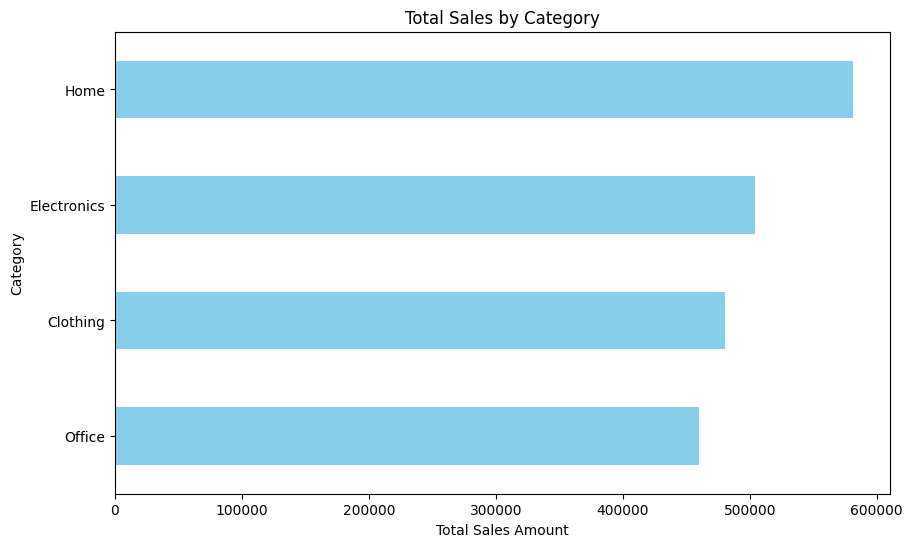

In [7]:
import matplotlib.pyplot as plt

# Group by Category and sum SaleAmount
category_sales = data.groupby('Category')['SaleAmount'].sum().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()

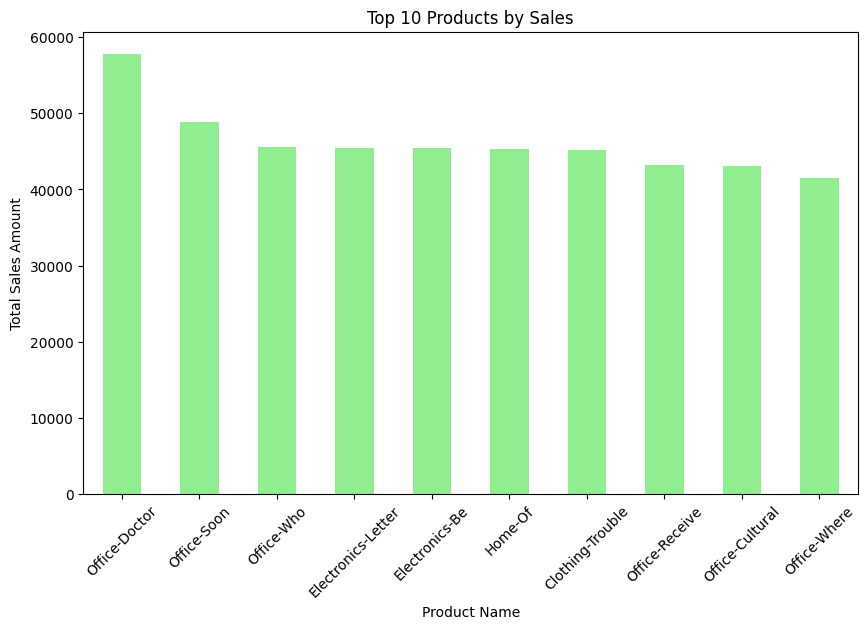

In [9]:
# Group by ProductName and sum SaleAmount
top_products = data.groupby('ProductName')['SaleAmount'].sum().nlargest(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

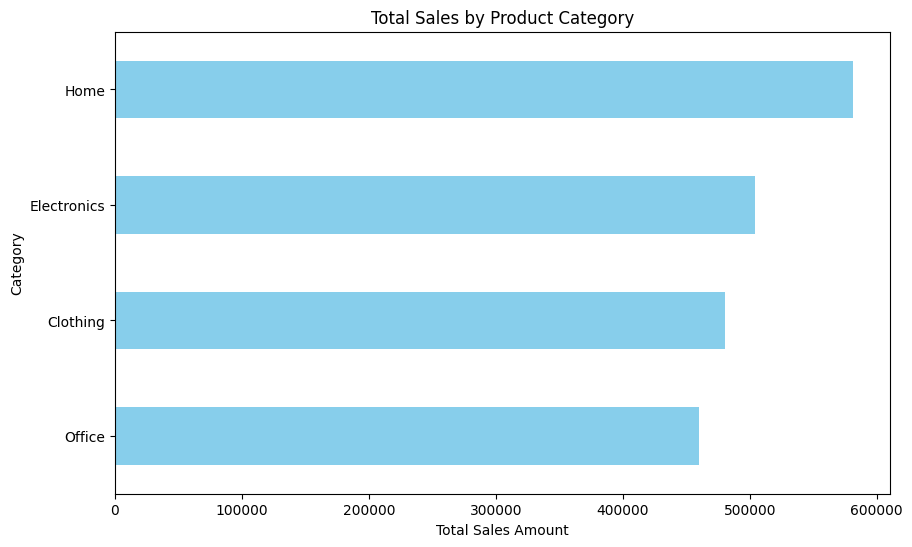

In [14]:
# Group by Category and sum SaleAmount
category_sales = data.groupby('Category')['SaleAmount'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()

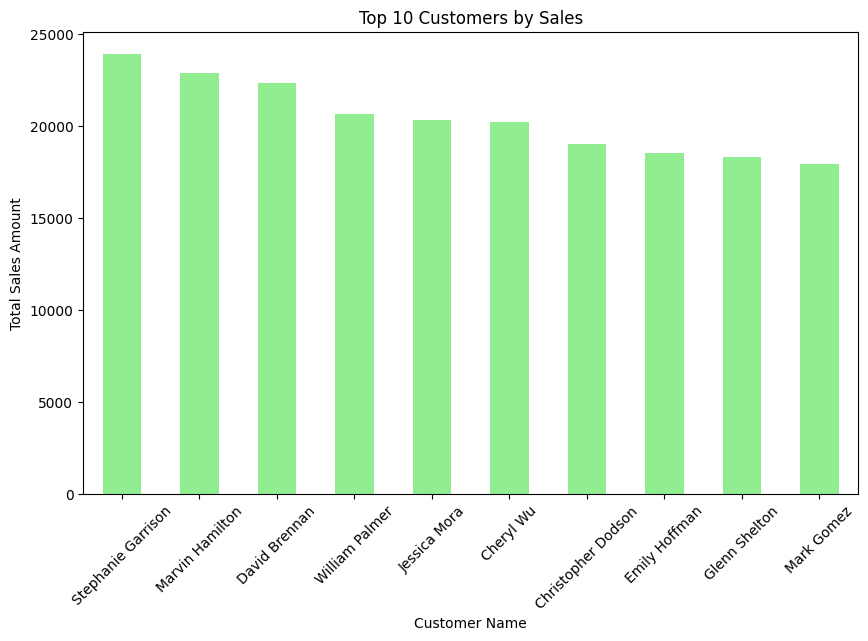

In [16]:
# Group by Customer and sum SaleAmount
top_customers = data.groupby('Name')['SaleAmount'].sum().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()